# Flight Price Prediction

## * Import libraries  

In [31]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Preprocessing of data & EDA 

In [33]:
df = pd.read_csv(r"C:\Users\prana\Downloads\Clean_Dataset.csv.zip")

In [34]:
print(df.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [35]:
df=df.drop(columns=['Unnamed: 0'])

In [36]:
df=df.drop(columns=['flight'])

In [37]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [38]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [39]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

## Visualising Some Features 

## 1.Number of passengers per airline 

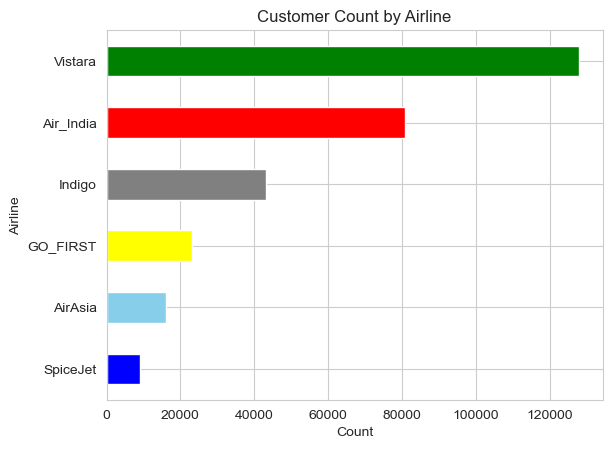

In [42]:
airline_counts = df['airline'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['Blue','Skyblue','Yellow','Grey','Red','Green']

airline_counts.plot(kind='barh', color=colors)
plt.title('Customer Count by Airline')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

## 2. Average ticket price for each airline

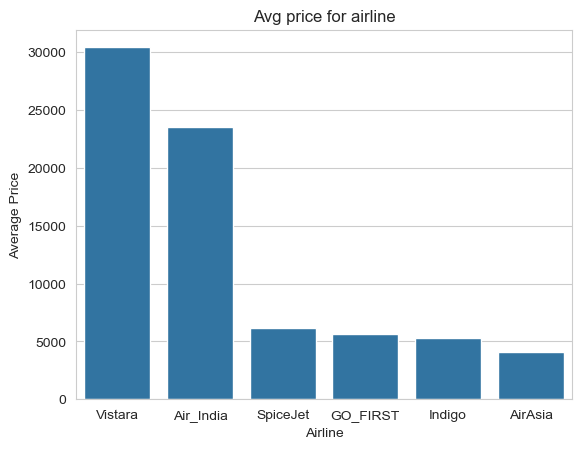

In [44]:
avg_price = df.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price', ascending=False)

sns.barplot(x='airline', y='price', data=avg_price)

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Avg price for airline')
plt.show()

## 3. Number of passengers in Business and Economy class

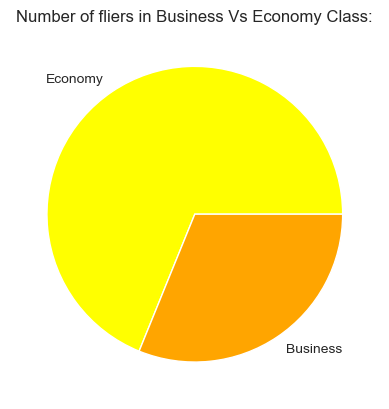

In [46]:
class_counts = df['class'].value_counts()
colors = ['Yellow','Orange']
class_counts.plot(kind='pie',colors=colors)

plt.title('Number of fliers in Business Vs Economy Class:')
plt.ylabel('')
plt.show()

## 4.Ticket prices based on class 

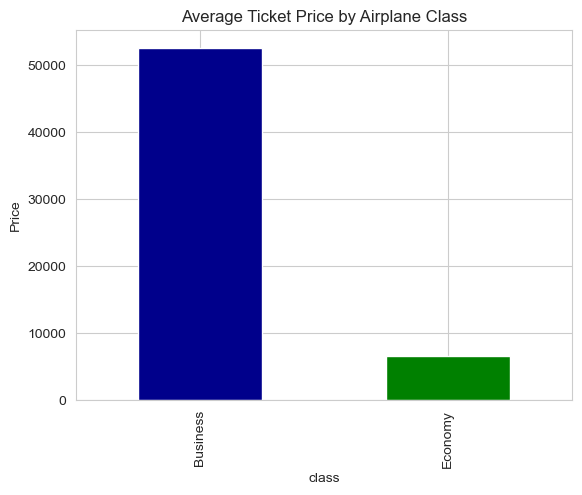

In [48]:
class_prices = df.groupby('class')['price'].mean()
sns.set_style('whitegrid')
class_prices.plot(kind='bar',color=['Darkblue','Green'])
plt.title('Average Ticket Price by Airplane Class')
plt.xlabel('class')
plt.ylabel('Price')
plt.show()

## 5. Ticket prices based on duration of flight

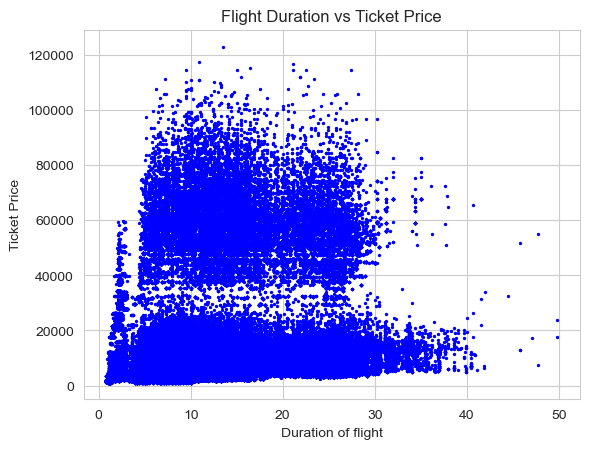

In [50]:
plt.scatter(df['duration'], df['price'], s=2, color='blue')

plt.title('Flight Duration vs Ticket Price')
plt.xlabel('Duration of flight')
plt.ylabel('Ticket Price')
plt.show()

In [51]:
## Inference : Most flights are short-duration and relatively low-cost,
## while long duration flights tend to be more
## expensive with a few high priced outliers

## 6. Relation between number of stops for a flight and the flight ticket price 

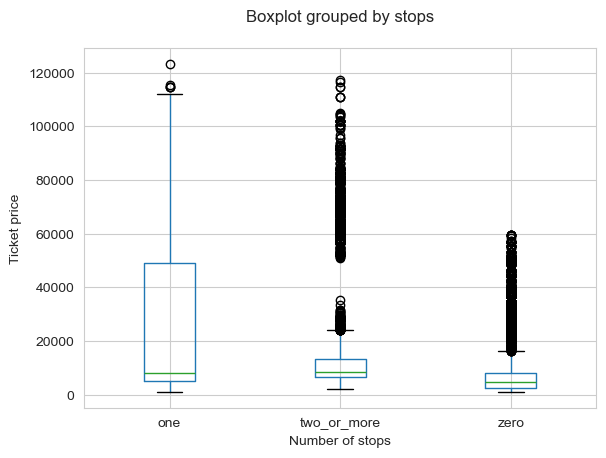

In [53]:
# Creating a box plot /whisker plot  of number of stops vs ticket price 
df.boxplot(column='price', by='stops')

plt.title('')
plt.xlabel('Number of stops')
plt.ylabel('Ticket price')
plt.show()

## Identifying the Categorical features

In [55]:
# capturing those of type *object*

cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns : {len(cat_cols)}")
print(f"Categorical columns: \n{cat_cols}")

Number of categorical columns : 7
Categorical columns: 
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [56]:
## Performing target encoding for all categorical varibales :



In [57]:
! pip install category_encoders

In [58]:
! pip install --upgrade category_encoders

In [59]:
cat_cols = ['airline', 'source_city', 'departure_time', 'stops',
            'arrival_time', 'destination_city', 'class']
target='price'
def target_encode(df, cat_cols,target):
    df_encoded = df.copy()
    for col in cat_cols:
        mean_map = df_encoded.groupby(col)[target].mean()
        df_encoded[col] = df_encoded[col].map(mean_map)
    return df_encoded

df_encoded = target_encode(df, cat_cols, target)
print(df_encoded.head())

        airline   source_city  departure_time        stops  arrival_time  \
0   6179.278881  18951.326639    21232.361894  9375.938535  21586.758341   
1   6179.278881  18951.326639    20370.676718  9375.938535  22231.076098   
2   4091.072742  18951.326639    20370.676718  9375.938535  14993.139521   
3  30396.536302  18951.326639    21630.760254  9375.938535  18494.598993   
4  30396.536302  18951.326639    21630.760254  9375.938535  22231.076098   

   destination_city        class  duration  days_left  price  
0      21372.529469  6572.342383      2.17          1   5953  
1      21372.529469  6572.342383      2.33          1   5953  
2      21372.529469  6572.342383      2.17          1   5956  
3      21372.529469  6572.342383      2.25          1   5955  
4      21372.529469  6572.342383      2.33          1   5955  


In [60]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  float64
 1   source_city       300153 non-null  float64
 2   departure_time    300153 non-null  float64
 3   stops             300153 non-null  float64
 4   arrival_time      300153 non-null  float64
 5   destination_city  300153 non-null  float64
 6   class             300153 non-null  float64
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 22.9 MB


In [61]:
df_encoded

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6179.278881,18951.326639,21232.361894,9375.938535,21586.758341,21372.529469,6572.342383,2.17,1,5953
1,6179.278881,18951.326639,20370.676718,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5953
2,4091.072742,18951.326639,20370.676718,9375.938535,14993.139521,21372.529469,6572.342383,2.17,1,5956
3,30396.536302,18951.326639,21630.760254,9375.938535,18494.598993,21372.529469,6572.342383,2.25,1,5955
4,30396.536302,18951.326639,21630.760254,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,30396.536302,21995.339871,21630.760254,22900.992482,23044.371615,20427.661284,52540.081124,10.08,49,69265
300149,30396.536302,21995.339871,18179.203331,22900.992482,21586.758341,20427.661284,52540.081124,10.42,49,77105
300150,30396.536302,21995.339871,20370.676718,22900.992482,21586.758341,20427.661284,52540.081124,13.83,49,79099
300151,30396.536302,21995.339871,20370.676718,22900.992482,23044.371615,20427.661284,52540.081124,10.00,49,81585


## Identifying numerical columns

In [63]:
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


## Checking for missing values 

In [65]:
features_with_na = [col for col in df.columns if df[col].isna().sum() > 0]

missing_values_df = pd.DataFrame(df[features_with_na].isnull().mean().sort_values(ascending=False),columns=['percentage'])
missing_values_df.head(10)

,percentage


### This dataset has no values 

# Scaling data

In [68]:
# Min Max Scaler : transformation of data

names = df.columns
indexes = df.index
sc = MinMaxScaler((0,1))
df = sc.fit_transform(df_encoded)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.079383,0.0,0.867088,0.0,0.876048,0.833363,0.0,0.027347,0.0,0.039749
1,0.079383,0.0,0.804496,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039749
2,0.000000,0.0,0.804496,0.0,0.315340,0.833363,0.0,0.027347,0.0,0.039773
3,1.000000,0.0,0.896027,0.0,0.613097,0.833363,0.0,0.028980,0.0,0.039765
4,1.000000,0.0,0.896027,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039765


## Setting our target varibales 

In [71]:
data_scaled.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [79]:
x = data_scaled[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left']]

In [81]:
y = data_scaled['price']

In [83]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.079383,0.0,0.867088,0.0,0.876048,0.833363,0.0,0.027347,0.0
1,0.079383,0.0,0.804496,0.0,0.930839,0.833363,0.0,0.030612,0.0
2,0.000000,0.0,0.804496,0.0,0.315340,0.833363,0.0,0.027347,0.0
3,1.000000,0.0,0.896027,0.0,0.613097,0.833363,0.0,0.028980,0.0
4,1.000000,0.0,0.896027,0.0,0.930839,0.833363,0.0,0.030612,0.0
...,...,...,...,...,...,...,...,...,...
300148,1.000000,1.0,0.896027,1.0,1.000000,0.565147,1.0,0.188776,1.0
300149,1.000000,1.0,0.645311,1.0,0.876048,0.565147,1.0,0.195714,1.0
300150,1.000000,1.0,0.804496,1.0,0.876048,0.565147,1.0,0.265306,1.0
300151,1.000000,1.0,0.804496,1.0,1.000000,0.565147,1.0,0.187143,1.0


In [85]:
y

0         0.039749
1         0.039749
2         0.039773
3         0.039765
4         0.039765
            ...   
300148    0.558844
300149    0.623124
300150    0.639473
300151    0.659856
300152    0.659856
Name: price, Length: 300153, dtype: float64

# Feature Engineering 

## * Pearsons correlation 

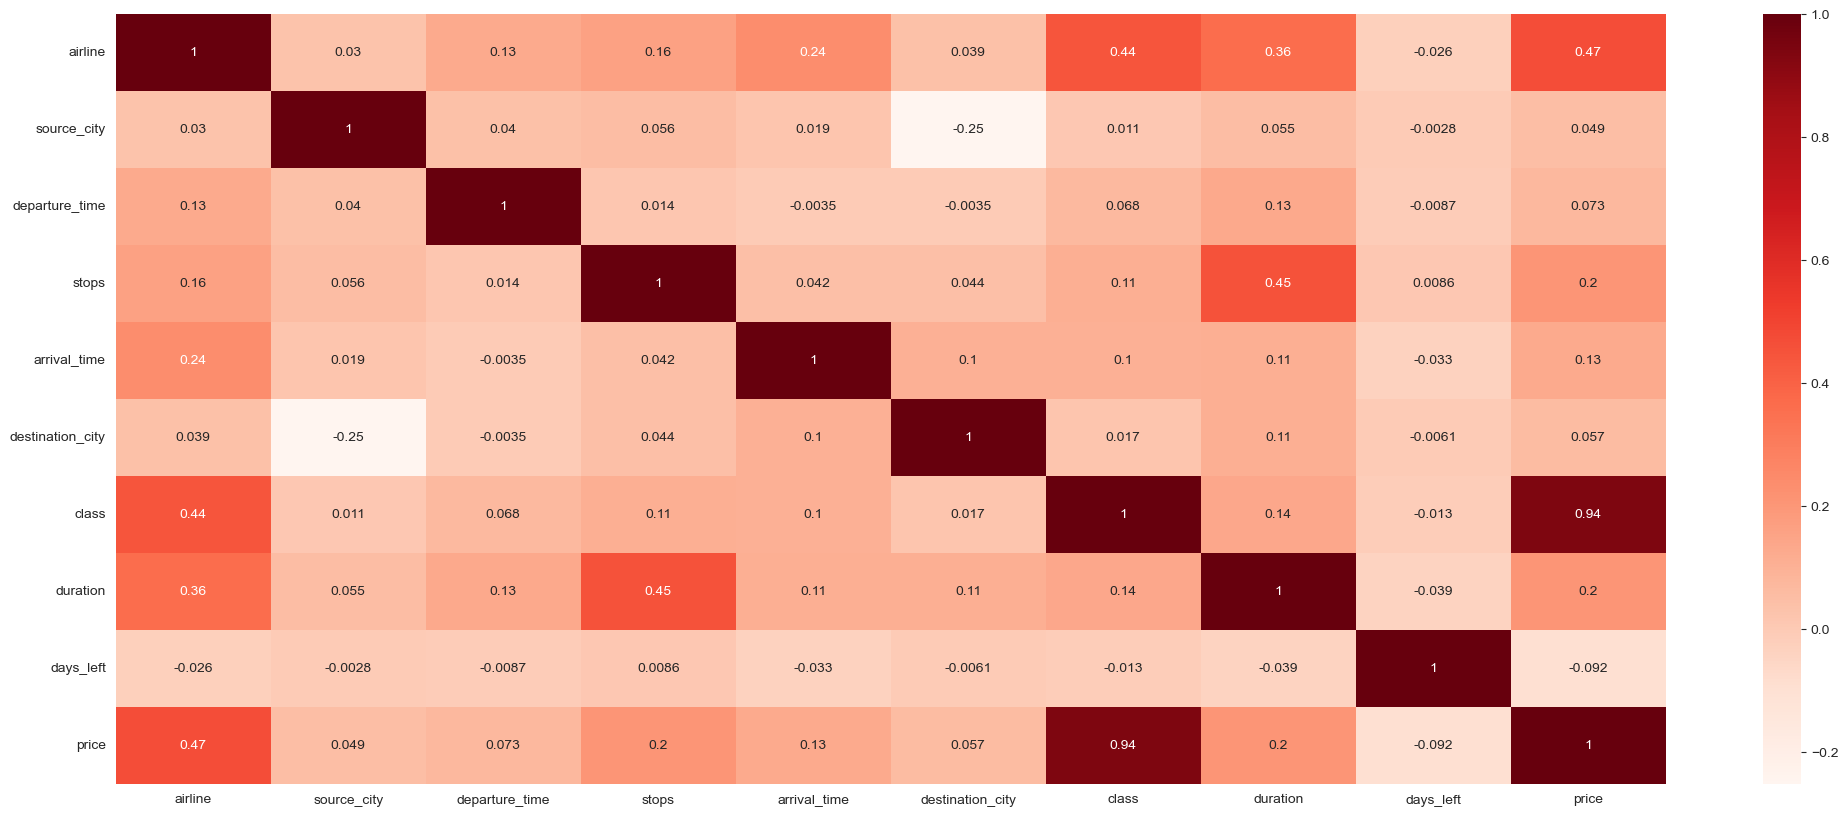

In [89]:
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [93]:
# Correlation with target variable price 
cor_target = abs(cor['price'])

relevant_feature = cor_target
relevant_feature

airline             0.471865
source_city         0.049099
departure_time      0.072732
stops               0.203405
arrival_time        0.128853
destination_city    0.056619
class               0.937860
duration            0.204222
days_left           0.091949
price               1.000000
Name: price, dtype: float64

### *According to Pearsons correlation , our top 4 relevant features are:- class, airline, stops and duration 

## * KBest selection 

In [101]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
X_important = selector.fit_transform(x, y)

mask = selector.get_support()

important_feature_names = x.columns[mask]

print(important_feature_names)

Index(['airline', 'source_city', 'destination_city', 'class'], dtype='object')


### According to KBest featurs , our important features are 'airline','source_city','destination_city','class'

# Model Building 

## *Split the data into train and test 

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

accuracy_train = reg.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

accuracy_test = reg.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Accuracy - Train: {}, Test: {}".format(accuracy_train, accuracy_test))
print("MSE - Train: {}, Test: {}".format(mse_train, mse_test))
print("R2 - Train: {}, Test: {}".format(r2_train, r2_test))

Accuracy - Train: 0.902068821024104, Test: 0.902090866012934
MSE - Train: 0.003391142206285722, Test: 0.003392808775216637
R2 - Train: 0.902068821024104, Test: 0.902090866012934


## * Accuracy of Linear Regression is 90.20%

# Decision Tree 

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict the values for the training and testing sets 
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# compute the accuracy, MSE, and R2 for the training set 
accuracy_train = dt.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# compute the accuracy, MSE and R2 for the testing set 
accuracy_test = dt.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Accuracy - Train: {}, Test: {}".format(accuracy_train, accuracy_test))
print("MSE - Train: {}, Test: {}".format(mse_train, mse_test))
print("R2 - Train: {}, Test: {}".format(r2_train, r2_test))

Accuracy - Train: 0.9992865963348827, Test: 0.9761391287007689
MSE - Train: 2.4703606187499706e-05, Test: 0.0008268418913708326
R2 - Train: 0.9992865963348827, Test: 0.9761391287007689


### * Accuracy of Decision Tree is 97.6%

# Random Forest

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=10, random_state=42)

rf.fit(X_train, y_train)

# Predict the values for the trianing and testing sets 
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# compute the accuracy, MSE and R2 for the training set 
accuracy_train = rf.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# compute the accuracy, MSe and R2 for the testing set 
accuracy_test = rf.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Accuracy - Train: {}, Test: {}".format(accuracy_train, accuracy_test))
print("MSE - Train: {}, Test: {}".format(mse_train, mse_test))
print("R2 - Train: {}, Test: {}".format(r2_train, r2_test))

Accuracy - Train: 0.9968504314180532, Test: 0.9839167010274774
MSE - Train: 0.00010906266075342834, Test: 0.0005573285725887021
R2 - Train: 0.9968504314180532, Test: 0.9839167010274774


## * Accuracy of Random Forest is 98.3%

In [139]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)
print("R2 Score:", r2)

R2 Score: 0.9839167010274774
